The final notebook in the series focused on analyzing the results of extracting impact sentences using BART large MNLI specifically by checking if the assumed threshold is qualified or not. Different ways to visualize the reuslts are shown below, notably are the confusion matrices and the F1 score.

Please ensure to paste the input_path, which is the location of 0_input.ipynb file, at the start of this notebook. This step is the only requirement to load all necessary information for the execution of the code.

Recommended Google Colab Runtime Type: CPU, as this notebook does not involve running machine learning models.

In [ ]:
# Input file path (must navigate at the beginning of each file)
input_path =  "/content/drive/My Drive/ImpactDataMining/Hurricane_Ian/Result"

All the below sections automatically retrieve data from the 0_input.ipynb file, as well as results from previous notebooks in this series. The code is designed to run using this information, so no further edits are required beyond this point.

In [ ]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from google.colab import drive
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
import time

start_time = time.time()

In [ ]:
def current_path():
  print("Current working directory")
  print(os.getcwd())
  print()

current_path()
drive.mount('/content/drive')
os.chdir(input_path)
current_path()

Current working directory
/content

Mounted at /content/drive
Current working directory
/content/drive/My Drive/ResilienceDataMining/Hurricane_Ian/Result



In [ ]:
with open('0_input.json', 'r') as file:
    data = json.load(file)
    result_path = data['result_path']
    keywords_non_impact = data['keywords_non_impact']

In [ ]:
os.makedirs(result_path, exist_ok=True)
os.chdir(result_path)
current_path()

Current working directory
/content/drive/My Drive/ResilienceDataMining/Hurricane_Ian/Result



In [ ]:
with open('1_results.json', 'r') as file:
    data = json.load(file)
    idx_body = data['idx_body']
    idx_table = data['idx_table']

with open('2a_results.json', 'r') as file:
    data = json.load(file)
    sent_all = data['sent_all']
    keywords = data['labels']
    label_pred = data['result_probs']
    result_labels = data['result_labels']

with open('4_results.json', 'r') as file:
    data = json.load(file)
    s_struct = data['labeled_data_struct']
    s_comm = data['labeled_data_comm']
    s_n = data['labeled_data_n']

In [ ]:
data_struct = s_struct + s_n
data_comm = s_comm + s_n
data_impact = s_struct + s_comm + s_n

In [ ]:
for i, n in enumerate(result_labels):
  if n in keywords_non_impact:
    label_pred[i] = 0

In [ ]:
y_true = [1 if n in data_impact else 0 for n in sent_all]
y_pred_6 = [1 if n >= .6 else 0 for n in label_pred]
y_pred_7 = [1 if n >= .7 else 0 for n in label_pred]
y_pred_8 = [1 if n >= .8 else 0 for n in label_pred]
y_pred_9 = [1 if n >= .9 else 0 for n in label_pred]

In [ ]:
true_positives = [i for i, (x, y) in enumerate(zip(y_true, y_pred_9)) if x == 1 and y == 1]
true_negatives = [i for i, (x, y) in enumerate(zip(y_true, y_pred_9)) if x == 0 and y == 0]
false_negatives = [i for i, (x, y) in enumerate(zip(y_true, y_pred_9)) if x == 1 and y == 0]
false_positives = [i for i, (x, y) in enumerate(zip(y_true, y_pred_9)) if x == 0 and y == 1]

In [ ]:
def result_analysis(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print("Accuracy:", acc)
    print("Precision:", pre)
    print("Recall:", rec)
    print("F1 Score: ", f1)

    confusion_mat = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    confusion_mat_para = [tn, fp, fn, tp]

    print("True negatives:", tn)
    print("False positives:", fp)
    print("False negatives:", fn)
    print("True positives:", tp)

    display_labels = ['0', '1']

    # Adjusting font sizes
    fig, ax = plt.subplots(figsize=(6, 6))  # Adjust the size of the figure

    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=display_labels)
    disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='d', colorbar=False) # Add colorbar=False here

    # Increase font size of labels, titles, and ticks
    plt.xlabel('Predicted Label', fontsize=15)
    plt.ylabel('True Label', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

    # Increase font size of numbers inside the confusion matrix
    for text in ax.texts:
        text.set_size(15)

    # Increase font size of the colorbar labels
    cbar = plt.gcf().colorbar(ax.images[0], ax=ax)
    cbar.ax.tick_params(labelsize=10)

    return acc, pre, rec, f1, confusion_mat_para


In [ ]:
# false_positives, result_labels, label_pred
def display_result(data, idx, result_labels, prob):
  sentences = [data[i] for i in idx]
  labels = [result_labels[i] for i in idx]
  probability = [prob[i] for i in idx]
  data = {'Sentences': sentences, 'Labels': labels, 'Probability': probability}
  df = pd.DataFrame(data)
  return df

In [ ]:
print('Sentences with False Positive label')
df_false_positive = display_result(sent_all, false_positives, result_labels, label_pred)
df_false_positive

Sentences with False Positive label


,Sentences,Labels,Probability
0,"Unlike Hurricane Charley (2004), water more so...",secondary water resistance,0.970217
1,It is notable that extensive losses were in pa...,building damage,0.967927
2,Interested readers may also consult the accomp...,service loss,0.977953
3,The death toll included 119 storm-related fata...,fatalities,0.992617
4,The majority of the deaths (57) were reported ...,fatalities,0.991090
5,"For a preliminary comparison, Hurricane Irma (...",fatalities,0.980405
6,Hurricane Michael (2018) caused 8 direct death...,fatalities,0.987524
7,Hurricane Andrew (1992) caused 15 direct death...,fatalities,0.987381
8,It should be noted that 2 injuries and damage ...,school damage,0.939972
9,All major structures are required to be design...,infrastructure resilience,0.925303


In [ ]:
print('Sentences with False Negative label')
df_false_negative = display_result(sent_all, false_negatives, result_labels, label_pred)
df_false_negative

Sentences with False Negative label


,Sentences,Labels,Probability
0,"In contrast, wind damage from Hurricane Ian ap...",infrastructure resilience,0.835542
1,The historical context of these numbers remain...,fatalities,0.837576
2,"Beyond Babcock Ranch, however, aerial imagery ...",roof damage,0.886896
3,Two other types of damage were also observed i...,causeway damage,0.875138
4,"The surge and flood impacts were more severe, ...",economic loss,0.606723
5,Several critical facilities experienced signif...,infrastructure resilience,0.829246


Accuracy: 0.7204724409448819
Precision: 0.6055555555555555
Recall: 1.0
F1 Score:  0.7543252595155708
True negatives: 74
False positives: 71
False negatives: 0
True positives: 109


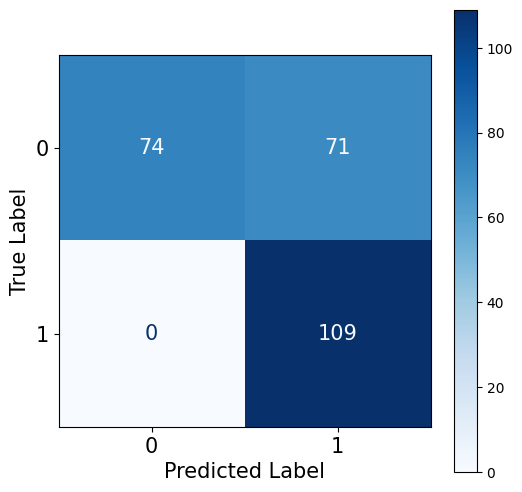

In [ ]:
acc_6, pre_6, rec_6, f1_6, confusion_mat_para_6 = result_analysis(y_true, y_pred_6)

Accuracy: 0.7834645669291339
Precision: 0.6666666666666666
Recall: 0.9908256880733946
F1 Score:  0.7970479704797048
True negatives: 91
False positives: 54
False negatives: 1
True positives: 108


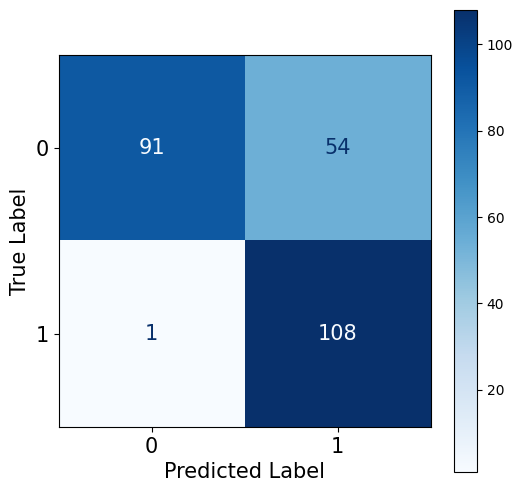

In [ ]:
acc_7, pre_7, rec_7, f1_7, confusion_mat_para_7 = result_analysis(y_true, y_pred_7)

Accuracy: 0.8267716535433071
Precision: 0.7152317880794702
Recall: 0.9908256880733946
F1 Score:  0.8307692307692309
True negatives: 102
False positives: 43
False negatives: 1
True positives: 108


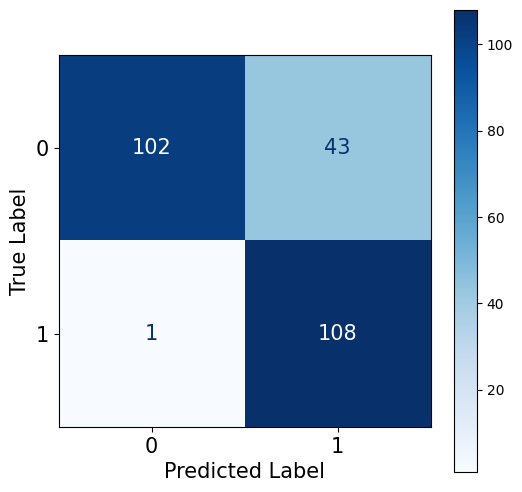

In [ ]:
acc_8, pre_8, rec_8, f1_8, confusion_mat_para_8 = result_analysis(y_true, y_pred_8)

Accuracy: 0.8661417322834646
Precision: 0.7862595419847328
Recall: 0.944954128440367
F1 Score:  0.8583333333333334
True negatives: 117
False positives: 28
False negatives: 6
True positives: 103


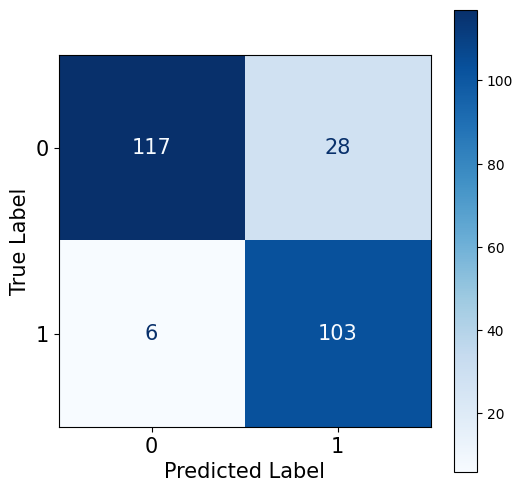

In [ ]:
acc_9, pre_9, rec_9, f1_9, confusion_mat_para_9 = result_analysis(y_true, y_pred_9)

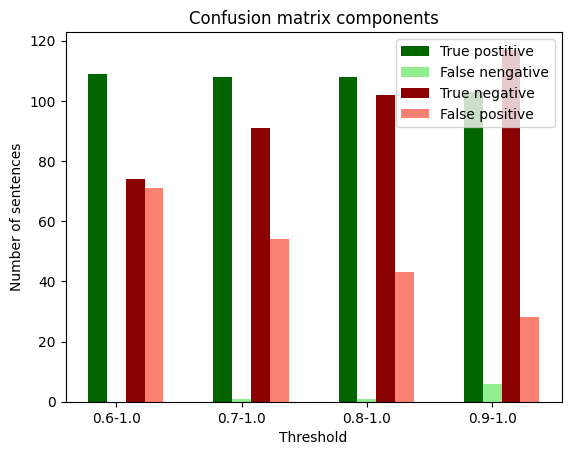

In [ ]:
# Create data for each bar chart
data_all = confusion_mat_para_6+confusion_mat_para_7+confusion_mat_para_8+confusion_mat_para_9
tn = data_all[0::4]
fp = data_all[1::4]
fn = data_all[2::4]
tp = data_all[3::4]

# Set the positions of the bars on the x-axis
x = range(len(tn))

# Set the width of each bar
width = 0.15

# Create the figure and axis objects
fig, ax = plt.subplots()

# Plot the bar charts
ax.bar(x, tp, width=width, color='darkgreen', label='True postitive')
ax.bar([val + width for val in x], fn, width=width, color='lightgreen', label='False nengative')
ax.bar([val + width*2 for val in x], tn, width=width, color='darkred', label='True negative')
ax.bar([val + width*3 for val in x], fp, width=width, color='salmon', label='False positive')

# Set the y-axis limits
# ax.set_ylim([0, 350])

# Set the x-axis tick positions and labels
ax.set_xticks([val + width for val in x])
ax.set_xticklabels(['0.6-1.0', '0.7-1.0', '0.8-1.0', '0.9-1.0'])

# Set the title and labels
ax.set_title('Confusion matrix components')
ax.set_xlabel('Threshold')
ax.set_ylabel('Number of sentences')

# Add a legend
ax.legend()

# Show the plot
plt.show()

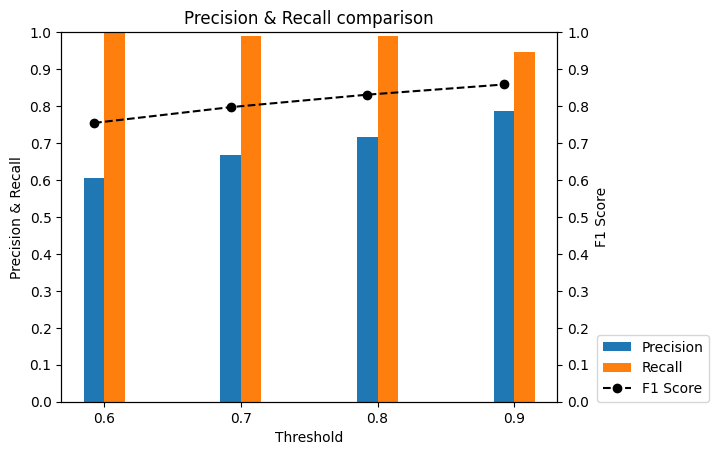

In [ ]:
# Create data for each bar chart
acc = [acc_6, acc_7, acc_8, acc_9]
pre = [pre_6, pre_7, pre_8, pre_9]
rec = [rec_6, rec_7, rec_8, rec_9]

F1 = [f1_6, f1_7, f1_8, f1_9]

# Set the positions of the bars on the x-axis
x = range(len(pre))

# Set the width of each bar
width = 0.15

# Create the figure and axis objects
fig, ax1 = plt.subplots()

# Plot the bar charts
ax1.bar(x, pre, width=width, label='Precision')
ax1.bar([val + width for val in x], rec, width=width, label='Recall')

# Adjust the x-tick positions to be at the center between the bars
tick_positions = [val + width/2 for val in x]

# Set the x-axis tick positions and labels
ax1.set_xticks(tick_positions)
ax1.set_xticklabels(['0.6', '0.7', '0.8', '0.9'])

# Create a second y-axis
ax2 = ax1.twinx()

# Line chart related to the right y-axis
ax2.plot(x, F1, color='k', marker='o', linestyle='--', label='F1 Score')

# Set the y-axis limits
ax1.set_ylim([0, 1])
ax1.set_yticks(np.arange(0, 1.1, 0.1))  # Set y-ticks for ax1
ax1.tick_params(axis='y')  # Adjust y-tick font size for ax1

ax2.set_ylim([0, 1])
ax2.set_yticks(np.arange(0, 1.1, 0.1))  # Set y-ticks for ax2
ax2.tick_params(axis='y')  # Adjust y-tick font size for ax2

# Set the title and labels
ax1.set_title('Precision & Recall comparison')
ax1.set_xlabel('Threshold')
ax1.set_ylabel('Precision & Recall')
ax2.set_ylabel('F1 Score')

# Get the handles and labels from ax1 and ax2
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine handles and labels
handles += handles2
labels += labels2

# Create a single legend for both ax1 and ax2
plt.legend(handles, labels, bbox_to_anchor=(1.32, 0.2))

# Set the title
ax1.set_title('Precision & Recall comparison')

# Set the x-axis label
ax1.set_xlabel('Threshold')

# Set the y-axis labels
ax1.set_ylabel('Precision & Recall')
ax2.set_ylabel('F1 Score')

# Show the plot
plt.show()

In [ ]:
table = {'Threshold': ['0.6-1.0', '0.7-1.0', '0.8-1.0', '0.9-1.0'],
         'Accuracy': acc,
         'Precision': pre,
         'Recall': rec,
         'F1 Score': F1}
df = pd.DataFrame(table)
df

,Threshold,Accuracy,Precision,Recall,F1 Score
0,0.6-1.0,0.720472,0.605556,1.000000,0.754325
1,0.7-1.0,0.783465,0.666667,0.990826,0.797048
2,0.8-1.0,0.826772,0.715232,0.990826,0.830769
3,0.9-1.0,0.866142,0.786260,0.944954,0.858333


In [ ]:
df.to_excel('5_F1score.xlsx', index=False)

In [ ]:
end_time = time.time()
execution_time = end_time - start_time

print("Execution time:", execution_time, "seconds")

Execution time: 26.303871154785156 seconds
